In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [44]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/nohit/Downloads/Dataset/Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [45]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

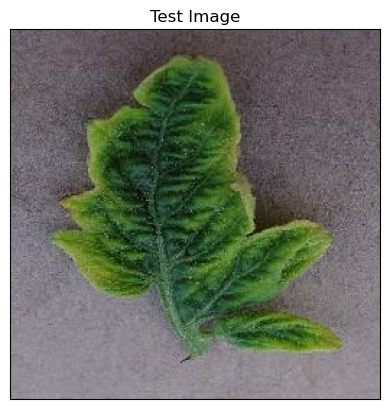

In [46]:
#Test Image Visualization
import cv2
image_path = 'C:/Users/nohit/Downloads/Dataset/Dataset/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/c7ea0d7b-d6f0-462a-a374-216ab8cb406c___YLCV_GCREC 2896.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [47]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 897ms/step


In [49]:
print(predictions)

[[6.14230569e-24 9.46585833e-24 4.92723057e-21 4.72912474e-18
  1.25406744e-20 2.55270667e-20 2.20076810e-24 5.77217844e-27
  3.46477036e-28 1.40045814e-23 9.00705173e-26 2.12023684e-19
  6.17973980e-18 4.75114842e-18 1.66417686e-23 1.33356487e-18
  1.40223292e-23 1.37240913e-28 8.44454923e-17 1.13472443e-20
  4.40614438e-26 8.99117342e-15 3.50364587e-21 2.14757448e-16
  1.47178085e-18 1.10947138e-19 1.33739645e-17 2.25117741e-18
  1.14380550e-16 5.97636654e-12 6.26563852e-20 2.93691640e-19
  6.73069049e-14 2.71095939e-16 2.59068263e-19 1.00000000e+00
  5.17174453e-18 1.78750984e-20]]


In [51]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


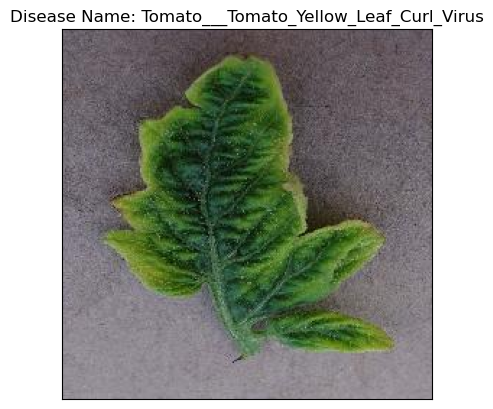

In [56]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()